# Image Classification of COVID-19 X-rays
# Task 2

## Multi-class Classification

In [2]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.1'

#### Loading Image Data

In [3]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10 
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # started off with 0.001 and experimented with reducing it gradually 
LEARNING_RATE2 = 0.0003

#### Generating Training and Validation Batches

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

C:\Users\accur\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### Building Model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.applications.VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet',classes=NUM_CLASSES),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu',name='dense_feature'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4,activation='sigmoid')])

model.get_layer('vgg16').trainable = False
model.build(input_shape=(None,224,224,3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
____________________________________

In [44]:
model2 = tf.keras.models.Sequential([
    tf.keras.applications.ResNet50V2(include_top=False,input_shape=(224,224,3),weights='imagenet',classes=NUM_CLASSES),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu',name='dense_feature'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4,activation='sigmoid')])

model2.get_layer('resnet50v2').trainable = False
model2.build(input_shape=(None,224,224,3))
model2.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_5 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 100352)            0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               25690368  
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 49,256,196
Trainable params: 25,691,396
Non-trainable params: 23,564,800
_________________________________

In [63]:
model3 = tf.keras.models.Sequential([
    tf.keras.applications.VGG19(include_top=False,input_shape=(224,224,3),weights='imagenet',classes=NUM_CLASSES),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu',name='dense_feature'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4,activation='sigmoid')])

model3.get_layer('vgg19').trainable = False
model3.build(input_shape=(None,224,224,3))
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 25088)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               6422784   
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 1028      
Total params: 26,448,196
Trainable params: 6,423,812
Non-trainable params: 20,024,384
__________________________________

#### Training Model

In [7]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

model.compile(tf.keras.optimizers.Adam(lr=LEARNING_RATE), 'categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_batches, epochs=NUM_EPOCHS,
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_steps=STEP_SIZE_VALID,
                    validation_data=valid_batches)


22
6
Epoch 1/100
21/21 [==============================] - 31s 1s/step - loss: 1.4597 - accuracy: 0.2476 - val_loss: 1.3662 - val_accuracy: 0.2400
Epoch 2/100
21/21 [==============================] - 30s 1s/step - loss: 1.3198 - accuracy: 0.2427 - val_loss: 1.2701 - val_accuracy: 0.2400
Epoch 3/100
21/21 [==============================] - 30s 1s/step - loss: 1.2882 - accuracy: 0.2621 - val_loss: 1.2369 - val_accuracy: 0.2800
Epoch 4/100
21/21 [==============================] - 30s 1s/step - loss: 1.2617 - accuracy: 0.2621 - val_loss: 1.1909 - val_accuracy: 0.2600
Epoch 5/100
21/21 [==============================] - 32s 2s/step - loss: 1.2558 - accuracy: 0.3447 - val_loss: 1.1592 - val_accuracy: 0.4200
Epoch 6/100
21/21 [==============================] - 30s 1s/step - loss: 1.1919 - accuracy: 0.3301 - val_loss: 1.1348 - val_accuracy: 0.4600
Epoch 7/100
21/21 [==============================] - 31s 1s/step - loss: 1.2031 - accuracy: 0.4563 - val_loss: 1.0871 - val_accuracy: 0.4400
Epoch 8/

Epoch 59/100
21/21 [==============================] - 31s 1s/step - loss: 0.6372 - accuracy: 0.7184 - val_loss: 0.6373 - val_accuracy: 0.6800
Epoch 60/100
21/21 [==============================] - 33s 2s/step - loss: 0.6701 - accuracy: 0.7136 - val_loss: 0.6875 - val_accuracy: 0.6800
Epoch 61/100
21/21 [==============================] - 32s 2s/step - loss: 0.6855 - accuracy: 0.6990 - val_loss: 0.6626 - val_accuracy: 0.6800
Epoch 62/100
21/21 [==============================] - 31s 1s/step - loss: 0.6475 - accuracy: 0.7233 - val_loss: 0.6728 - val_accuracy: 0.7000
Epoch 63/100
21/21 [==============================] - 31s 1s/step - loss: 0.5954 - accuracy: 0.7136 - val_loss: 0.6236 - val_accuracy: 0.6800
Epoch 64/100
21/21 [==============================] - 31s 1s/step - loss: 0.7082 - accuracy: 0.6602 - val_loss: 0.6140 - val_accuracy: 0.7000
Epoch 65/100
21/21 [==============================] - 31s 1s/step - loss: 0.6360 - accuracy: 0.7427 - val_loss: 0.6162 - val_accuracy: 0.7400
Epoch 

In [45]:
#FIT MODEL 2

model2.compile(tf.keras.optimizers.Adam(lr=LEARNING_RATE), 'categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_batches, epochs=NUM_EPOCHS,
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_steps=STEP_SIZE_VALID,
                    validation_data=valid_batches)

C:\Users\accur\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\accur\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
21/21 [==============================] - 22s 1s/step - loss: 1.5502 - accuracy: 0.3252 - val_loss: 1.7595 - val_accuracy: 0.5000
Epoch 2/100
21/21 [==============================] - 19s 881ms/step - loss: 1.3479 - accuracy: 0.3883 - val_loss: 1.8128 - val_accuracy: 0.4000
Epoch 3/100
21/21 [==============================] - 18s 843ms/step - loss: 1.3487 - accuracy: 0.3544 - val_loss: 1.3228 - val_accuracy: 0.5000
Epoch 4/100
21/21 [==============================] - 18s 852ms/step - loss: 1.3270 - accuracy: 0.4854 - val_loss: 1.8380 - val_accuracy: 0.4400
Epoch 5/100
21/21 [==============================] - 19s 899ms/step - loss: 1.3260 - accuracy: 0.4612 - val_loss: 1.2347 - val_accuracy: 0.4400
Epoch 6/100
21/21 [==============================] - 19s 904ms/step - loss: 1.1813 - accuracy: 0.5194 - val_loss: 1.1169 - val_accuracy: 0.4800
Epoch 7/100
21/21 [==============================] - 18s 851ms/step - loss: 1.3020 - accuracy: 0.5097 - val_loss: 1.0309 - val_accuracy: 0.

Epoch 58/100
21/21 [==============================] - 21s 985ms/step - loss: 0.8682 - accuracy: 0.6553 - val_loss: 1.0755 - val_accuracy: 0.6800
Epoch 59/100
21/21 [==============================] - 22s 1s/step - loss: 0.7999 - accuracy: 0.6748 - val_loss: 1.0897 - val_accuracy: 0.6600
Epoch 60/100
21/21 [==============================] - 20s 976ms/step - loss: 0.9345 - accuracy: 0.6117 - val_loss: 1.3535 - val_accuracy: 0.6000
Epoch 61/100
21/21 [==============================] - 20s 932ms/step - loss: 0.8669 - accuracy: 0.6456 - val_loss: 1.0081 - val_accuracy: 0.6600
Epoch 62/100
21/21 [==============================] - 20s 959ms/step - loss: 0.8145 - accuracy: 0.6714 - val_loss: 1.0564 - val_accuracy: 0.6400
Epoch 63/100
21/21 [==============================] - 21s 1s/step - loss: 0.7862 - accuracy: 0.6262 - val_loss: 0.7645 - val_accuracy: 0.7800
Epoch 64/100
21/21 [==============================] - 18s 856ms/step - loss: 0.9059 - accuracy: 0.6456 - val_loss: 0.8675 - val_accuracy

In [85]:
#FIT MODEL 3

model3.compile(tf.keras.optimizers.Adam(lr=LEARNING_RATE), 'categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(train_batches, epochs=NUM_EPOCHS,
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_steps=STEP_SIZE_VALID,
                    validation_data=valid_batches)

C:\Users\accur\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\accur\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
21/21 [==============================] - 40s 2s/step - loss: 1.4113 - accuracy: 0.2476 - val_loss: 1.3788 - val_accuracy: 0.2600
Epoch 2/100
21/21 [==============================] - 40s 2s/step - loss: 1.3960 - accuracy: 0.3301 - val_loss: 1.3857 - val_accuracy: 0.2800
Epoch 3/100
21/21 [==============================] - 39s 2s/step - loss: 1.3849 - accuracy: 0.3107 - val_loss: 1.3845 - val_accuracy: 0.3600
Epoch 4/100
21/21 [==============================] - 39s 2s/step - loss: 1.3820 - accuracy: 0.2718 - val_loss: 1.3757 - val_accuracy: 0.2800
Epoch 5/100
21/21 [==============================] - 39s 2s/step - loss: 1.3811 - accuracy: 0.2864 - val_loss: 1.3489 - val_accuracy: 0.2400
Epoch 6/100
21/21 [==============================] - 41s 2s/step - loss: 1.3584 - accuracy: 0.3107 - val_loss: 1.3205 - val_accuracy: 0.3600
Epoch 7/100
21/21 [==============================] - 42s 2s/step - loss: 1.3301 - accuracy: 0.3155 - val_loss: 1.2952 - val_accuracy: 0.2400
Epoch 8/100
2

Epoch 59/100
21/21 [==============================] - 39s 2s/step - loss: 0.6598 - accuracy: 0.6990 - val_loss: 0.6540 - val_accuracy: 0.6800
Epoch 60/100
21/21 [==============================] - 39s 2s/step - loss: 0.6851 - accuracy: 0.6990 - val_loss: 0.8082 - val_accuracy: 0.6200
Epoch 61/100
21/21 [==============================] - 38s 2s/step - loss: 0.7492 - accuracy: 0.6650 - val_loss: 0.6693 - val_accuracy: 0.7200
Epoch 62/100
21/21 [==============================] - 39s 2s/step - loss: 0.6944 - accuracy: 0.6748 - val_loss: 0.5643 - val_accuracy: 0.7800
Epoch 63/100
21/21 [==============================] - 39s 2s/step - loss: 0.7146 - accuracy: 0.7087 - val_loss: 0.6854 - val_accuracy: 0.7000
Epoch 64/100
21/21 [==============================] - 39s 2s/step - loss: 0.6697 - accuracy: 0.6748 - val_loss: 0.6440 - val_accuracy: 0.6600
Epoch 65/100
21/21 [==============================] - 39s 2s/step - loss: 0.6377 - accuracy: 0.7286 - val_loss: 0.6339 - val_accuracy: 0.6800
Epoch 

#### Plotting Accuracy and Loss During Training

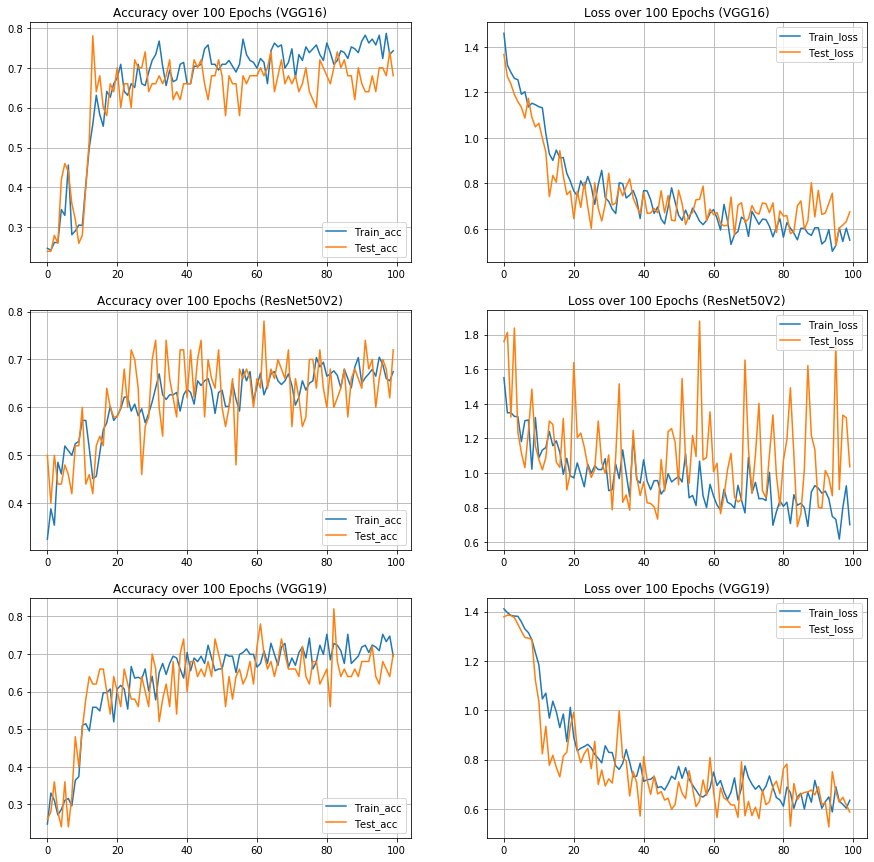

In [86]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))


plt.subplot(3,2,1)
plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label = 'Test_acc')
plt.title('Accuracy over 100 Epochs (VGG16)')
plt.legend(loc='lower right')
plt.grid(True)


plt.subplot(3,2,2)
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label = 'Test_loss')
plt.title('Loss over 100 Epochs (VGG16)')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(history2.history['accuracy'], label='Train_acc')
plt.plot(history2.history['val_accuracy'], label = 'Test_acc')
plt.title('Accuracy over 100 Epochs (ResNet50V2)')
plt.legend(loc='lower right')
plt.grid(True)


plt.subplot(3,2,4)
plt.plot(history2.history['loss'], label='Train_loss')
plt.plot(history2.history['val_loss'], label = 'Test_loss')
plt.title('Loss over 100 Epochs (ResNet50V2)')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(history3.history['accuracy'], label='Train_acc')
plt.plot(history3.history['val_accuracy'], label = 'Test_acc')
plt.title('Accuracy over 100 Epochs (VGG19)')
plt.legend(loc='lower right')
plt.grid(True)


plt.subplot(3,2,6)
plt.plot(history3.history['loss'], label='Train_loss')
plt.plot(history3.history['val_loss'], label = 'Test_loss')
plt.title('Loss over 100 Epochs (VGG19)')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

#### Testing Model

In [95]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Model 1 Test loss:' , x[0])
print('Model 1 Test accuracy:',x[1])

print()
eval_generator.reset()
x2 = model2.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Model 2 Test loss:' , x2[0])
print('Model 2 Test accuracy:',x2[1])

print()
eval_generator.reset()
x3 = model3.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Model 3 Test loss:' , x3[0])
print('Model 3 Test accuracy:',x3[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 5s 145ms/step - loss: 0.6988 - accuracy: 0.7222
Model 1 Test loss: 0.6987707614898682
Model 1 Test accuracy: 0.7222222089767456

36/36 [==============================] - 4s 113ms/step - loss: 0.9349 - accuracy: 0.7222
Model 2 Test loss: 0.9349138736724854
Model 2 Test accuracy: 0.7222222089767456

36/36 [==============================] - 6s 176ms/step - loss: 0.9466 - accuracy: 0.4167
Model 3 Test loss: 0.9466089606285095
Model 3 Test accuracy: 0.4166666567325592


## TSNE Plot


Found 270 images belonging to 4 classes.


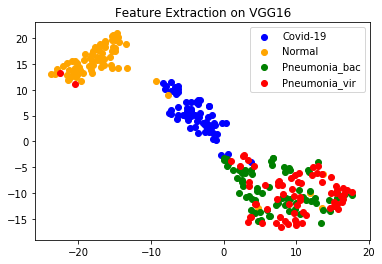

In [92]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_feature').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

y_pred = intermediate_layer_model.predict(tsne_eval_generator)

y = tsne_eval_generator.labels
label_names = ["Covid-19","Normal","Pneumonia_bac","Pneumonia_vir"]

X_2d = TSNE(n_components=2, random_state=0).fit_transform(y_pred)

colors = 'b', 'orange', 'g', 'r'
for i, c, label in zip(range(len(y_pred)), colors, label_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.title("Feature Extraction on VGG16")
plt.legend()
plt.show()

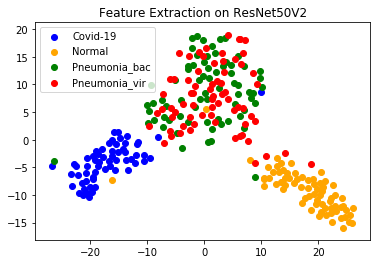

In [93]:
intermediate_layer_model2 = tf.keras.models.Model(inputs=model2.input,
                                        outputs=model2.get_layer('dense_feature').output)

tsne_eval_generator.reset()

y_pred2 = intermediate_layer_model2.predict(tsne_eval_generator)
X_2d_2 = TSNE(n_components=2, random_state=0).fit_transform(y_pred2)

colors = 'b', 'orange', 'g', 'r'
for i, c, label in zip(range(len(y_pred)), colors, label_names):
    plt.scatter(X_2d_2[y == i, 0], X_2d_2[y == i, 1], c=c, label=label)
plt.title("Feature Extraction on ResNet50V2")
plt.legend()
plt.show()

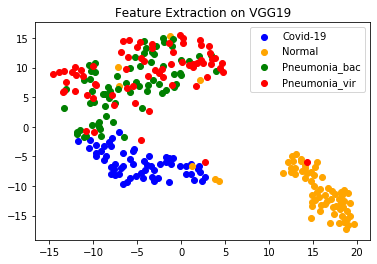

In [94]:
intermediate_layer_model3 = tf.keras.models.Model(inputs=model3.input,
                                        outputs=model3.get_layer('dense_feature').output)

tsne_eval_generator.reset()

y_pred3 = intermediate_layer_model3.predict(tsne_eval_generator)
X_2d_3 = TSNE(n_components=2, random_state=0).fit_transform(y_pred3)

colors = 'b', 'orange', 'g', 'r'
for i, c, label in zip(range(len(y_pred3)), colors, label_names):
    plt.scatter(X_2d_3[y == i, 0], X_2d_3[y == i, 1], c=c, label=label)
plt.title("Feature Extraction on VGG19")
plt.legend()
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->